<a href="https://colab.research.google.com/github/balu337/Course/blob/master/BikeRentalDemandPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BikeRental Demand Prediction

**Problem Statment**

Build model to predict demand of shared bikes based on independent factors.

**Data**
Data set is built based on various meteorological surveys and people's styles impacting on daily bike demands across the American market.


In this notebook, we'll build a linear regression model to predict demand using an appropriate predictor variable.

**Approach**

1.   Step 1: Project Stetup & Data Import
2.   Step 2: Understanding and Visualizing data
3.   Step 3: Preparing Data for modelling
4.   Step 4: Build and Train the Model
5.   Step 5: Model Evaluation



# Step 1: Project Stetup & Data Import

Step 1 : Project Stetup & Data Import

In [233]:
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Stats Model

import statsmodels
import statsmodels.api as sm

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



#supress warning
import warnings
warnings.filterwarnings('ignore')

In [234]:
#Connect to Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [235]:
#read the CSV file
filepath="/content/drive/MyDrive/IITB_AIML/3_LrAssignment/BikeDailyData.csv"
dfb=pd.read_csv(filepath)
dfb.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Step 2: Understanding and Visualizing the data

## Analysis of Raw Data

In [236]:
dfb.shape

(730, 16)

In [237]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [238]:
dfb.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [239]:
#Null Check
dfb.isnull().mean()*100

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [240]:
dfb.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Drop 'casual' and 'registered' columns

In [241]:
dfb=dfb.drop(['casual', 'registered'],axis=1)

In [242]:
dfb.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [243]:
dfb['holiday'].value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

## Data Mapping


Based on data dictionary map the varibles so that its can used in buidling models.


In [244]:
def mapVariables( df,colname,map):
  print('Before transfromation' )
  print(df[colname].value_counts())

  # Apply the mapping
  df[colname] = df[colname].map(map)

  print('Before transfromation' )
  print(df[colname].value_counts())
  return df[colname]

In [245]:
#Mapping Season Numeric Values to Text
# From Data Dictionary season  : 1:spring, 2:summer, 3:fall, 4:winter
mapVariables(dfb,'season',{1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

Before transfromation
season
3    188
2    184
1    180
4    178
Name: count, dtype: int64
Before transfromation
season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64


0      spring
1      spring
2      spring
3      spring
4      spring
        ...  
725    spring
726    spring
727    spring
728    spring
729    spring
Name: season, Length: 730, dtype: object

In [246]:
#Mapping weekday Numeric Values to Text
# From Data Dictionary  weekday 1: 'Wed', 2: 'Thu', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tue'
mapVariables(dfb,'weekday',{1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})

Before transfromation
weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64
Before transfromation
weekday
Mon      105
Tues     105
Wed      105
Thurs    104
Sat      104
Sun      104
Fri      103
Name: count, dtype: int64


0        Mon
1       Tues
2        Wed
3      Thurs
4        Fri
       ...  
725      Sat
726      Sun
727      Mon
728     Tues
729      Wed
Name: weekday, Length: 730, dtype: object

In [247]:
#Mapping mnth Numeric Values to Text
# From Data Dictionary  mnth 1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'
mapVariables(dfb,'mnth',{1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec' })

Before transfromation
mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64
Before transfromation
mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64


0      Jan
1      Jan
2      Jan
3      Jan
4      Jan
      ... 
725    Dec
726    Dec
727    Dec
728    Dec
729    Dec
Name: mnth, Length: 730, dtype: object

In [248]:
dfb['holiday'].value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [249]:
#Mapping holiday Numeric Values to Text
# From Data Dictionary  holiday : 1: 'yes', 0:'no'
mapVariables(dfb,'holiday',{ 1: 'yes', 0:'no'  })

Before transfromation
holiday
0    709
1     21
Name: count, dtype: int64
Before transfromation
holiday
no     709
yes     21
Name: count, dtype: int64


0      no
1      no
2      no
3      no
4      no
       ..
725    no
726    no
727    no
728    no
729    no
Name: holiday, Length: 730, dtype: object

In [250]:
#Mapping workingday Numeric Values to Text
# From Data Dictionary  workingday : 1: 'yes', 0:'no'
mapVariables(dfb,'workingday',{  1: 'yes', 0:'no'  })

Before transfromation
workingday
1    499
0    231
Name: count, dtype: int64
Before transfromation
workingday
yes    499
no     231
Name: count, dtype: int64


0       no
1       no
2      yes
3      yes
4      yes
      ... 
725    yes
726    yes
727     no
728     no
729    yes
Name: workingday, Length: 730, dtype: object

In [251]:
#Mapping weathersit Numeric Values to Text
# From Data Dictionary  weathersit:  1: 'clear', 2: 'vearylight', 3: 'light', 4: 'heavy'
mapVariables(dfb,'weathersit',{ 1: 'clear', 2: 'vearylight', 3: 'light', 4: 'heavy'})

dfb.head()

Before transfromation
weathersit
1    463
2    246
3     21
Name: count, dtype: int64
Before transfromation
weathersit
clear         463
vearylight    246
light          21
Name: count, dtype: int64


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,spring,0,Jan,no,Mon,no,vearylight,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,spring,0,Jan,no,Tues,no,vearylight,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,spring,0,Jan,no,Wed,yes,clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,spring,0,Jan,no,Thurs,yes,clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,spring,0,Jan,no,Fri,yes,clear,9.305237,11.46350,43.6957,12.522300,1600


In [252]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    object 
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    object 
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 80.0+ KB


## Function Definitions

In [253]:
#Fucntion to Print Histogram and Box Plots next to each other for better comaparision

def drawPlots( data, dataType):
  # Create a figure and a set of subplots
  fig, (ax_hist,ax_box) = plt.subplots(1, 2, figsize=(10, 6))


  # Create a histogram of the data
  sns.histplot(data=data, ax=ax_hist)

  # Create a box plot of the data
  sns.boxplot(data=data, ax=ax_box)


  # Set the title and labels of the plots
  ax_box.set_title(dataType+' Box Plot')
  ax_hist.set_title(dataType+ ' Histogram')
  ax_box.set_xlabel(dataType)
  ax_hist.set_xlabel(dataType)

  # Show the plot
  plt.show()


## EDA

### Univariant Analysis

In [254]:
#Columns in data set


num_cols=[ 'hum', 'windspeed','temp', 'atemp', 'cnt']

cat_cols=['season','yr', 'mnth', 'holiday', 'weekday','weathersit','workingday',]
extra_col=['instant','dteday','casual', 'registered']

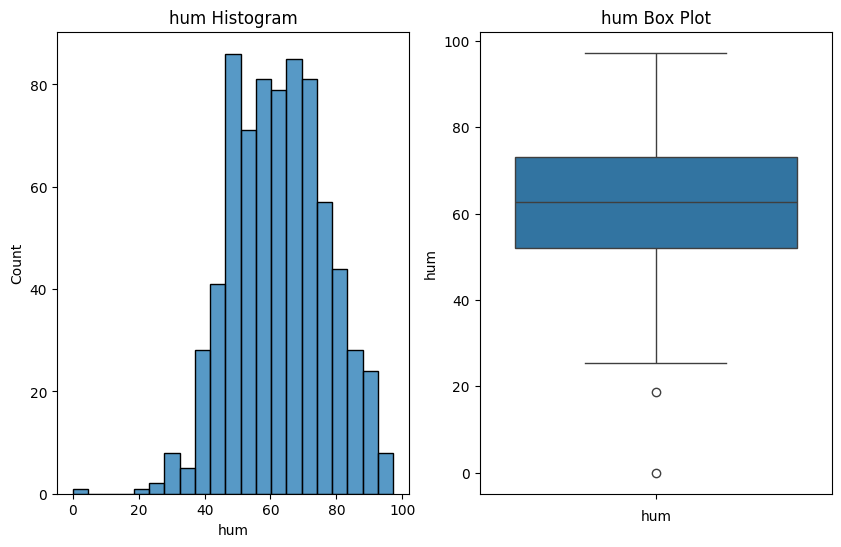

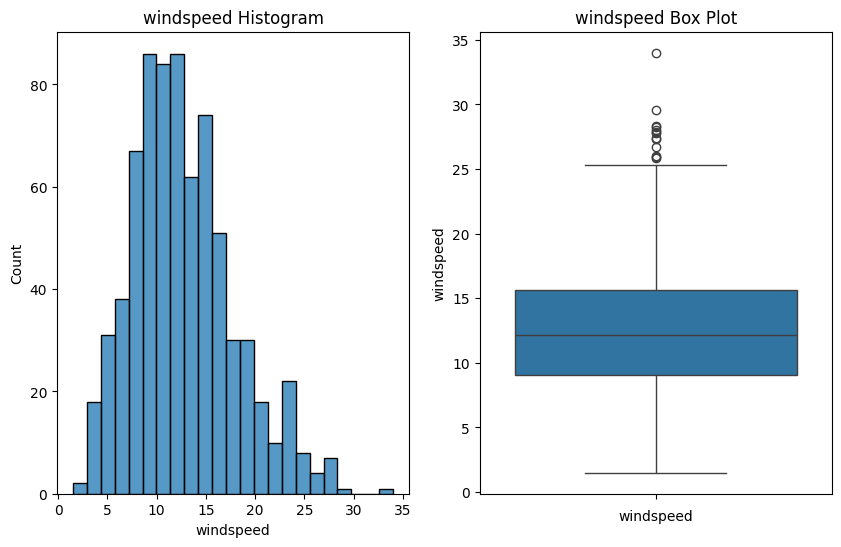

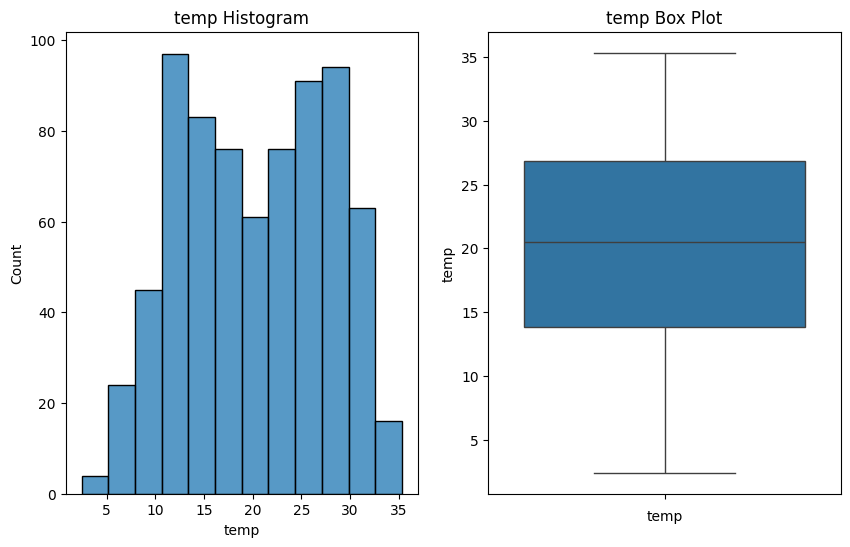

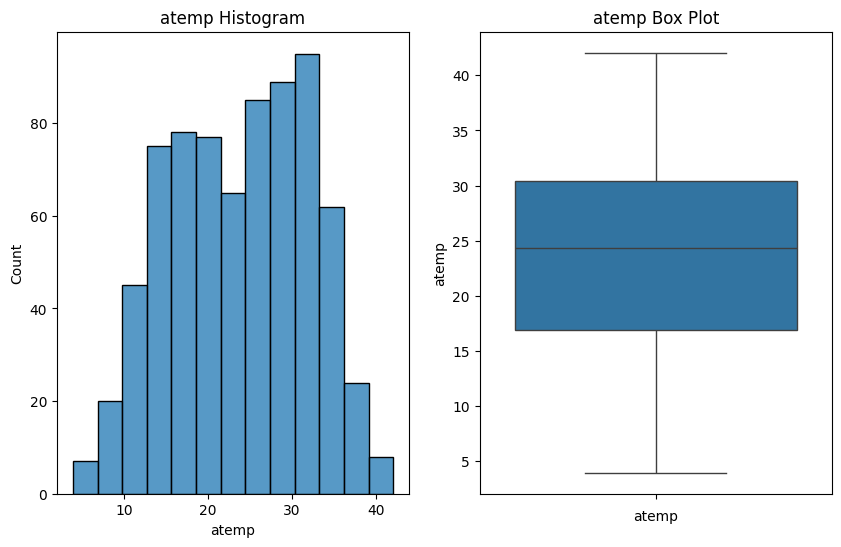

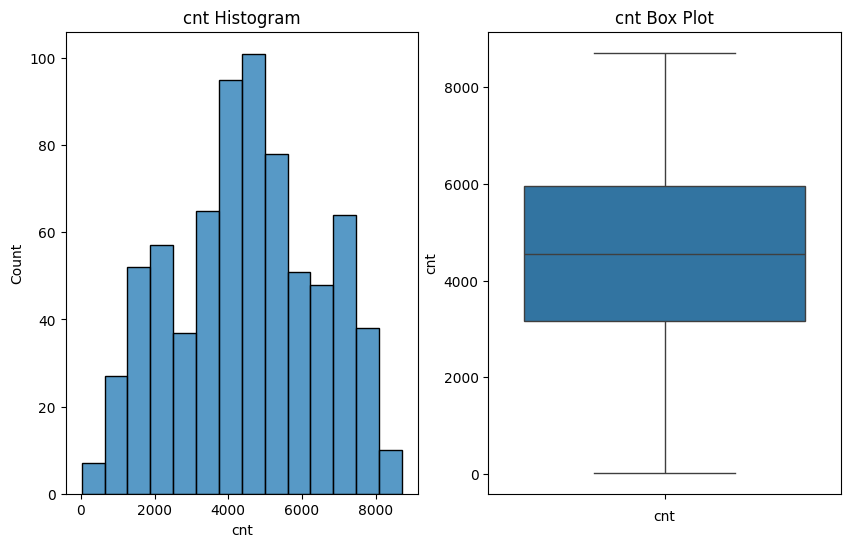

In [255]:

num_cols

for col in num_cols:
  drawPlots (dfb[col],col)



### Univareiant Analysis Inference

*   Wind Speed has outliers
*   Each varaible looks noramlly distributed



### Bivariant Analysis

### Visualizing Numeric Variables

<function matplotlib.pyplot.show(close=None, block=None)>

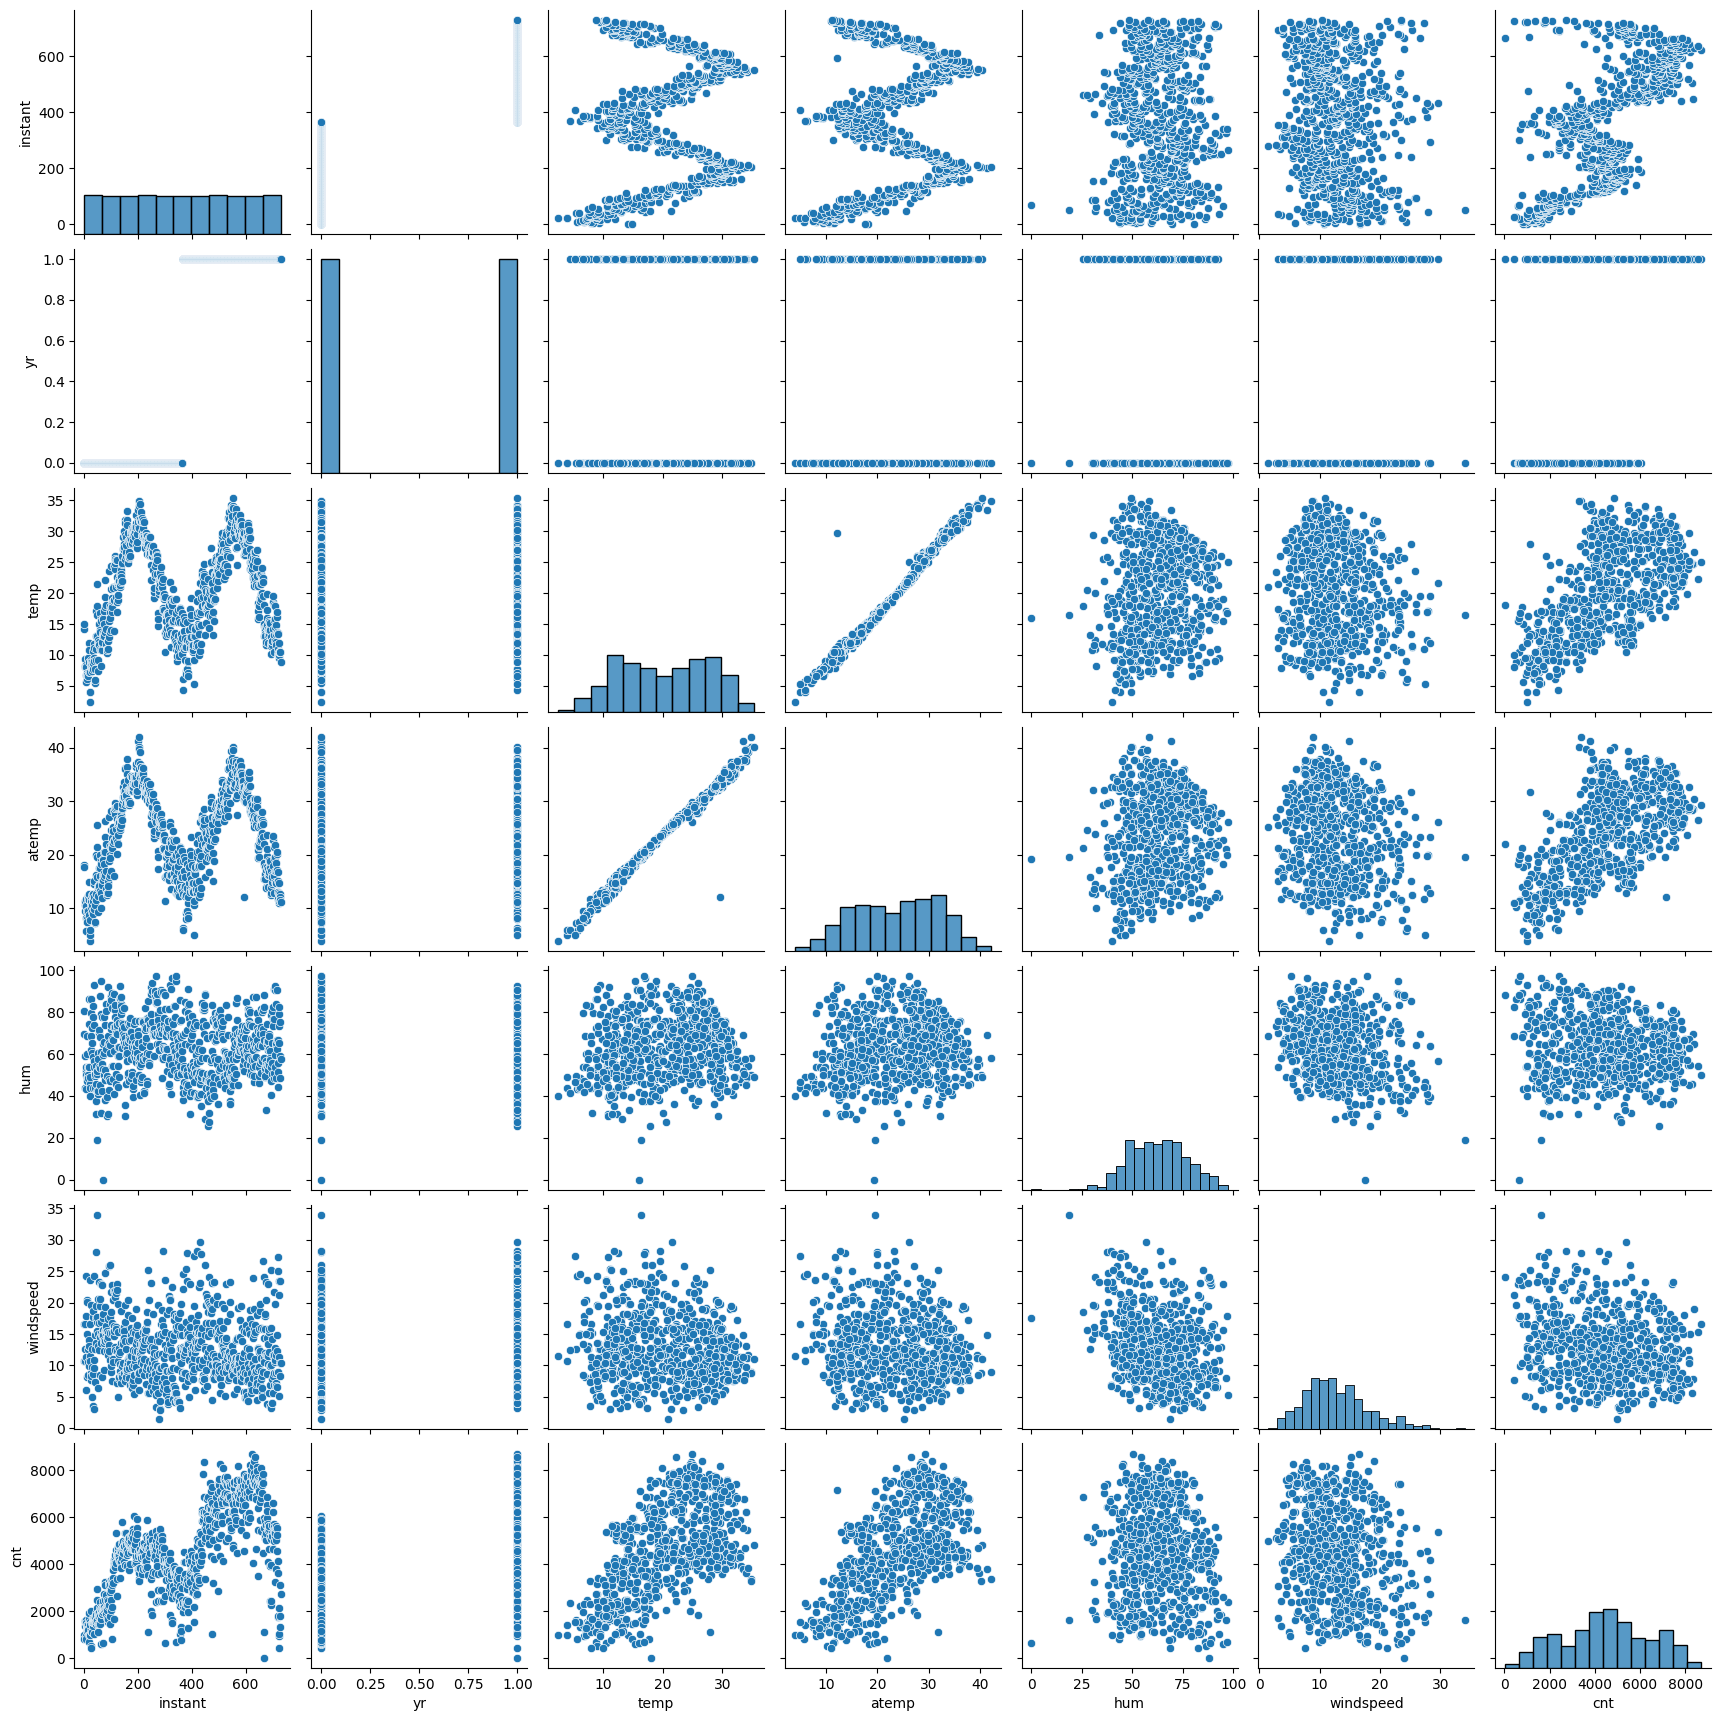

In [256]:

sns.pairplot(dfb)
plt.show

### Visualizing Categorical Variables

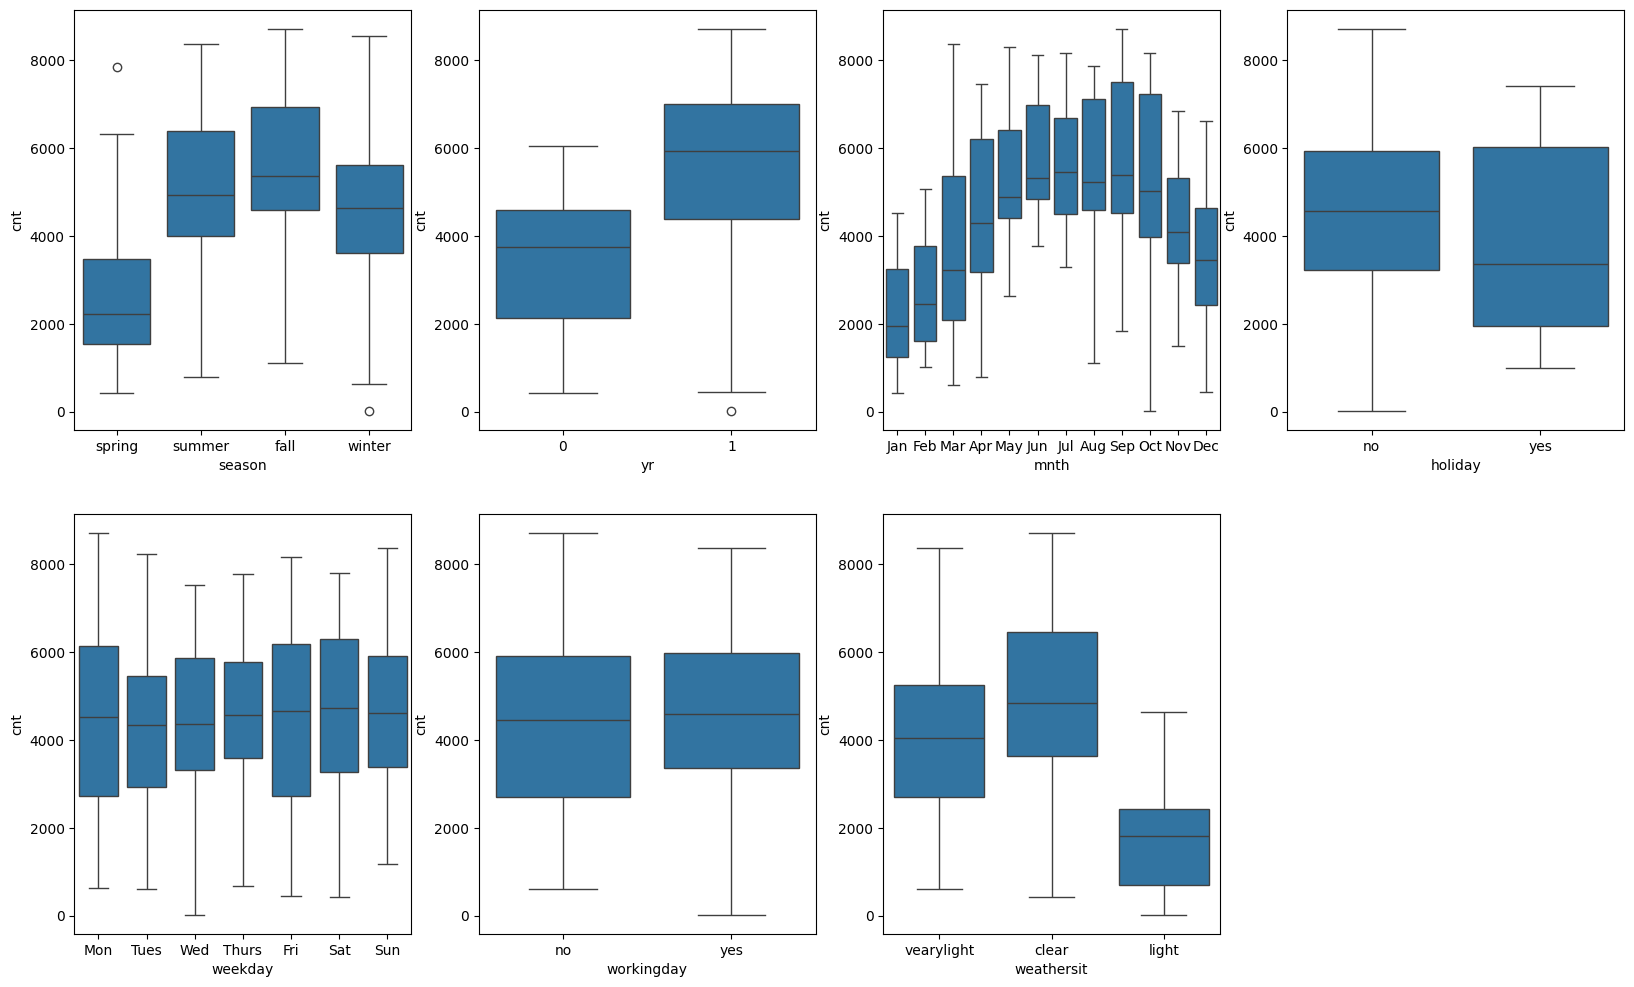

In [257]:
target_col ='cnt'


plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = target_col, data = dfb)

plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = target_col, data = dfb)

plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = target_col, data = dfb)

plt.subplot(2,4,4)
sns.boxplot(x = 'holiday',  y =target_col, data = dfb)

plt.subplot(2,4,5)
sns.boxplot(x = 'weekday',  y =target_col, data = dfb)

plt.subplot(2,4,6)
sns.boxplot(x = 'workingday',  y =target_col, data = dfb)

plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit',  y =target_col, data = dfb)


plt.show()

### Bivaraint analysis Inference

*   fall has maximum usage and spring has lowest usage
*   2019 has more usage when compared to 2018
*   On clear days (Few clouds, Partly cloudy, Partly cloudy) usage is high
*   Its observed that on Non Holidays usage is higher than holidays.




Multi Variant Anlaysis

# Step 3: Preparing Data for modelling


Encoding
  

*   Converting binary varaible to 1/0
*   Other categorical values t0 dummy variables


  

In [258]:
dfb.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,spring,0,Jan,no,Mon,no,vearylight,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,spring,0,Jan,no,Tues,no,vearylight,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,spring,0,Jan,no,Wed,yes,clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,spring,0,Jan,no,Thurs,yes,clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,spring,0,Jan,no,Fri,yes,clear,9.305237,11.46350,43.6957,12.522300,1600


## Categorical Variable Yes/No to Numeric ( 1,0)

In [259]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    object 
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    object 
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 80.0+ KB


In [260]:
#yes/no varaibles

varlist =['workingday', 'holiday']

dfb[varlist] = dfb[varlist].apply( lambda x:x.map({'yes':1,'no':0}))

dfb[varlist].head()

,workingday,holiday
0,0,0
1,0,0
2,1,0
3,1,0
4,1,0


In [261]:
#Question : Do we need holiday and working day...trendig yes
#Question : Do we need temp and a temp

In [262]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 80.0+ KB


## Dummy Varaibles

*   Create dummy varibles for weathersit,season, mnth, weekday



In [263]:
def dummyvar(colname,df):
  status = pd.get_dummies(df[colname],dtype='int',drop_first =True)
  #print(status.head())
  df=pd.concat([df,status],axis=1 )
  df=df.drop(colname,axis=1)
  #df.head()
  return df

In [264]:
#print('weathersit : ', dummyvar('weathersit',dfb))
dfb=dummyvar('weathersit',dfb)

In [265]:
#print('season : ', dummyvar('season',dfb))
dfb=dummyvar('season',dfb)

In [266]:
#print('mnth : ', dummyvar('mnth',dfb))
dfb=dummyvar('mnth',dfb)

In [267]:
#print('weekday : ', dummyvar('weekday',dfb))
dfb=dummyvar('weekday',dfb)

In [268]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   yr          730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   temp        730 non-null    float64
 6   atemp       730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
 10  light       730 non-null    int64  
 11  vearylight  730 non-null    int64  
 12  spring      730 non-null    int64  
 13  summer      730 non-null    int64  
 14  winter      730 non-null    int64  
 15  Aug         730 non-null    int64  
 16  Dec         730 non-null    int64  
 17  Feb         730 non-null    int64  
 18  Jan         730 non-null    int64  
 19  Jul         730 non-null    i

In [269]:
dummy_var=['weekday','mnth','season','weathersit']


In [270]:
dfb.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed
0,1,01-01-2018,0,0,0,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,1,0,0,0,0,0
1,2,02-01-2018,0,0,0,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,1,0
2,3,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,1
3,4,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,1,0,0
4,5,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [271]:
##############
#Dropping Date as its not used in Analysis
dfb=dfb.drop(['dteday','instant'],axis=1)

Derived Metrics

Data Cleansing

# Step 4: Build and Train the Model


## Split Data to Train and Test Sets


In [272]:
#Splitting Data in to Training Data set(70% ) and Test Dataset ( 30%)

df_train,df_test=train_test_split(dfb,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


## Rescaling the Features

In [273]:
#Rescaling

scaler=MinMaxScaler()

#create list of Numneric Variables

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_cols=['hum', 'windspeed','temp', 'atemp', 'cnt']
num_vars=num_cols


### Fit and Transform using Train Data

In [274]:
#Fit on data

#scaler.fit
df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,light,vearylight,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,...,0,0,0,0,1,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,1,0,0,0


<Axes: >

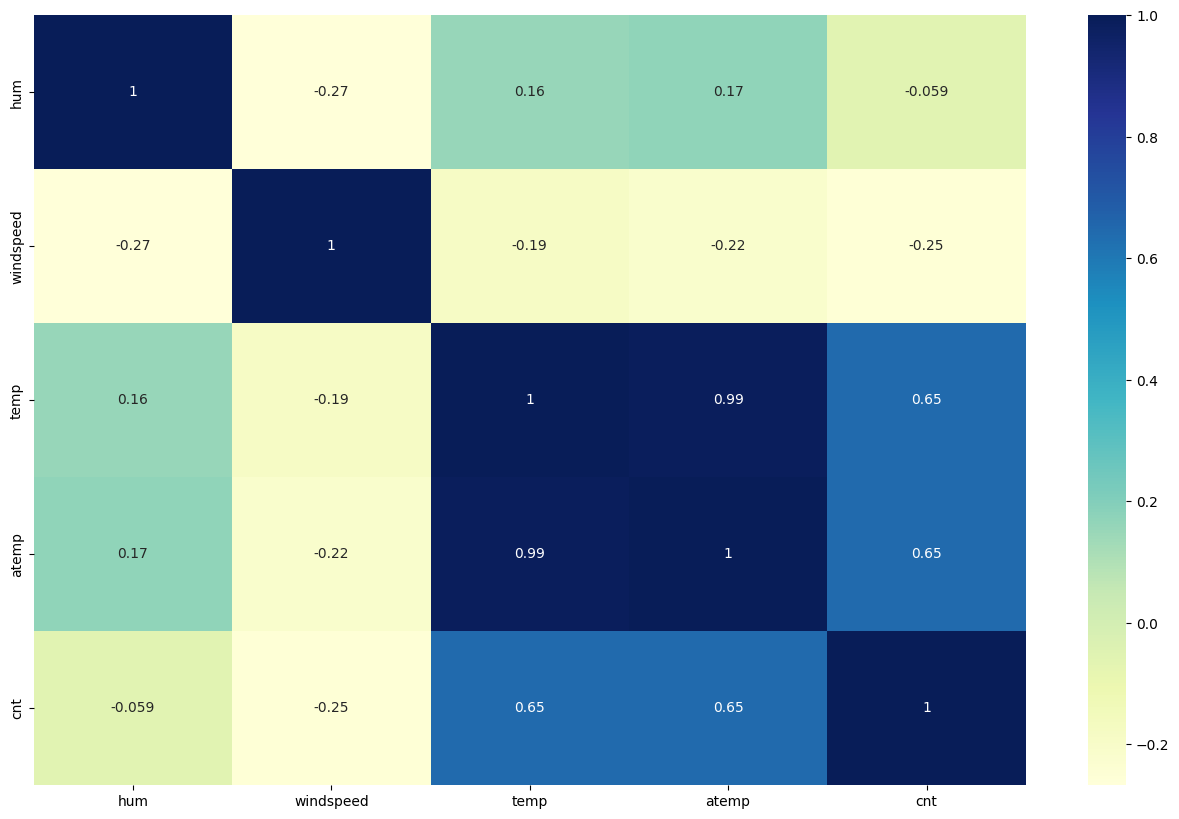

In [275]:
#heatmap
#only cosider numeric varaibles

df_heatmap =df_train[num_vars]

plt.figure(figsize=(16,10))
sns.heatmap(df_heatmap.corr(),annot=True,cmap="YlGnBu")

###Multi variant Anlaysis

*   temp and atemp are highly correlated. One of them can be dropped.
*   Windspeed and Humidty have -ve impact on the usage



## Dividing in to X and Y sets for Model building

In [276]:
#x_train , t_train

y_train = df_train.pop('cnt')
x_train = df_train

## Building Model

### Recursive Featue Elimination ( RFE)

In [277]:
lm = LinearRegression()

rfe = RFE(lm,n_features_to_select = 10)
rfe =rfe.fit(x_train,y_train)

In [278]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 12),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('light', True, 1),
 ('vearylight', False, 3),
 ('spring', False, 2),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 13),
 ('Dec', False, 8),
 ('Feb', False, 9),
 ('Jan', False, 6),
 ('Jul', True, 1),
 ('Jun', False, 18),
 ('Mar', False, 20),
 ('May', False, 11),
 ('Nov', False, 7),
 ('Oct', False, 17),
 ('Sep', True, 1),
 ('Mon', False, 4),
 ('Sat', False, 19),
 ('Sun', False, 16),
 ('Thurs', False, 15),
 ('Tues', False, 10),
 ('Wed', False, 14)]

In [279]:
col =x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'light', 'summer',
       'winter', 'Jul', 'Sep'],
      dtype='object')

In [280]:
x_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'vearylight', 'spring', 'Aug', 'Dec', 'Feb',
       'Jan', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Sat', 'Sun', 'Thurs',
       'Tues', 'Wed'],
      dtype='object')

### Building Model Using Stats Model

In [281]:
# Using columns form RFE as starting point for manual selection
x_train_rfe=x_train[col]
x_train_rfe.head()

,yr,holiday,temp,hum,windspeed,light,summer,winter,Jul,Sep
576,1,0,0.815169,0.725633,0.264686,0,0,0,1,0
426,1,0,0.442393,0.640189,0.255342,0,0,0,0,0
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,0


In [282]:
x_train_sm =sm.add_constant(x_train_rfe)

lr =sm.OLS(y_train,x_train_sm)

#fit
lr_model=lr.fit()

#lr_model.params
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Wed, 29 May 2024   Prob (F-statistic):          2.79e-186
Time:                        13:41:49   Log-Likelihood:                 494.18
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2682      0.026     10.292      0.0

### Observations on Key Statistics


1.   p-values for all the varaibles is less ( below .05)
2.   R-Squared value is .83 which describes 83% of varaince





Checking for VIF

In [283]:
x_train_sm_new =x_train_sm.drop(['const'],axis=1)
x_train_sm_new.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'light', 'summer',
       'winter', 'Jul', 'Sep'],
      dtype='object')

In [284]:
#VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_sm_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm_new.values, i) for i in range(x_train_sm_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.29
2,temp,9.29
4,windspeed,3.54
0,yr,2.02
6,summer,1.76
7,winter,1.68
8,Jul,1.55
9,Sep,1.29
5,light,1.09
1,holiday,1.04


Observations of VIF values


1.   VIF avlue for varaibles ( hum, temp ) is greater than 5.
2.   We need to drop humidity and run another iteration




In [285]:
# Function to drop a varaible and regenrate the summary

def drop_tune_model(train_data,col_name):

    train_data=train_data.drop(col_name,axis=1)
    x_train_lm = sm.add_constant(train_data)

    # create frist model
    lr =sm.OLS(y_train,x_train_lm)

    #fit
    lr_model=lr.fit()

    return lr_model,x_train_lm

### Iteration 1 : Drop Humidity as VIF value is High

In [286]:


lr_model_new, x_train_sm_new = drop_tune_model(x_train_sm_new,'hum')
print(lr_model_new.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     229.0
Date:                Wed, 29 May 2024   Prob (F-statistic):          4.42e-171
Time:                        13:41:49   Log-Likelihood:                 455.47
No. Observations:                 510   AIC:                            -890.9
Df Residuals:                     500   BIC:                            -848.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0840      0.018      4.794      0.0

### Observations on Key Statistics


1.   p-values for all the varaibles is less ( below .05) except for 'Jul'
2.   p-value for 'Jul' is .115 which is greater than .05 and it need to be dropped.
3.   R-Squared value is .805 which describes 80% of varaince

In [287]:
x_train_sm_new =x_train_sm_new.drop(['const'],axis=1)
x_train_sm_new.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'light', 'summer', 'winter',
       'Jul', 'Sep'],
      dtype='object')

In [288]:
#VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_sm_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm_new.values, i) for i in range(x_train_sm_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.96
3,windspeed,3.01
0,yr,2.00
5,summer,1.75
7,Jul,1.51
6,winter,1.43
8,Sep,1.28
4,light,1.06
1,holiday,1.03


Observations of VIF values


1.   VIF value for variables is less than 5

### Iteration 2 : Drop Jul as VIF value is High

In [289]:
lr_model_new, x_train_sm_new = drop_tune_model(x_train_sm_new,'Jul')
print(lr_model_new.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     256.6
Date:                Wed, 29 May 2024   Prob (F-statistic):          9.22e-172
Time:                        13:41:49   Log-Likelihood:                 454.20
No. Observations:                 510   AIC:                            -890.4
Df Residuals:                     501   BIC:                            -852.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0875      0.017      5.029      0.0

### Observations on Key Statistics

1.   p-values for all the varaibles is less ( below .05)
2.   R-Squared value is .804 which describes 80% of varaince

In [290]:
x_train_sm_new =x_train_sm_new.drop(['const'],axis=1)
x_train_sm_new.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'light', 'summer', 'winter',
       'Sep'],
      dtype='object')

In [291]:
#VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_sm_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm_new.values, i) for i in range(x_train_sm_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.63
3,windspeed,2.97
0,yr,2.00
5,summer,1.55
6,winter,1.34
7,Sep,1.20
4,light,1.06
1,holiday,1.03


Observations of VIF values

1.   VIF value for variables is less than 5

**Final Model **

cnt= 0.0875+ 0.2334*yr -0.0867*holiday + 0.5682 *temp -0.1455 * windspeed -0.2535 *light + 0.0812 *summer + 0.1261*winter + 0.0895 *Sep


# Step 5 Model Evaluation

## Residual Analysis

In [292]:
y_train_pred= lr_model_new.predict(sm.add_constant(x_train_sm_new))

Text(0.5, 0, 'Errors')

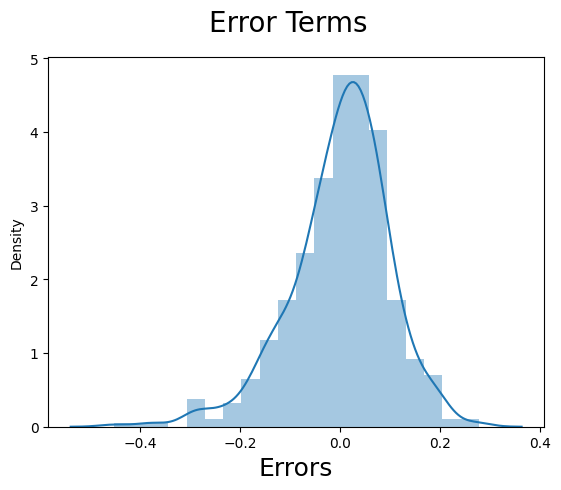

In [293]:
res= y_train -y_train_pred
#Plotting graph to validate Error terms are normally distibuted.
#check if histogram is centered at zero

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label

**Inference:** Error terms are notmally distributed

Text(0, 0.5, 'error')

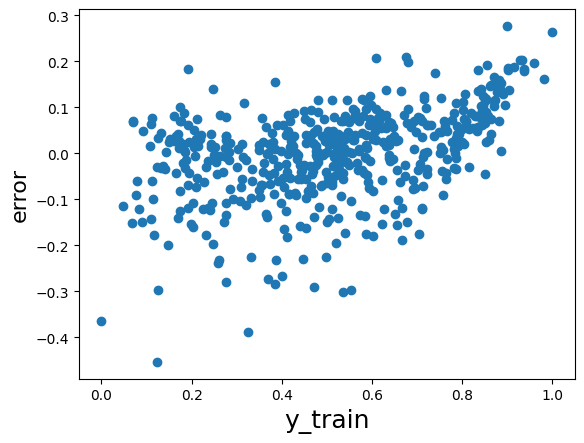

In [294]:
#Plotting graph to validate if Error terms are independent.
ig = plt.figure()
plt.scatter(y_train,res)
fig.suptitle('y_train vs error  ', fontsize=20)              # Plot heading
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('error', fontsize=16)                          # Y-label

**Inference** :   Error terms are independent of each other. Below graph does not have any pattern which confirm error terms are independent.

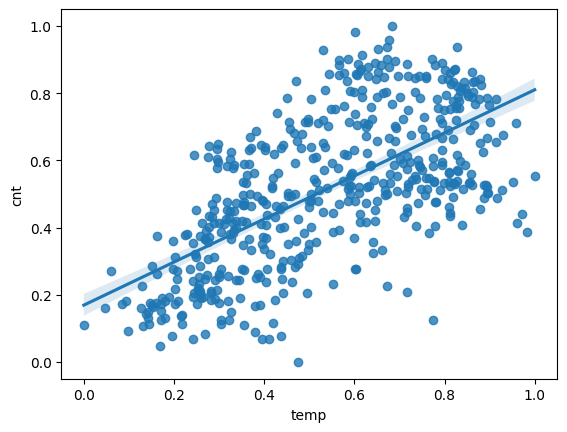

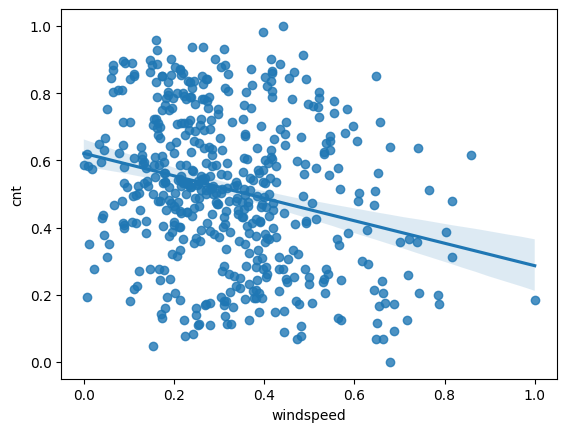

In [311]:
#sns.pairplot(x_train_sm_new)
#question
x= [ 'temp', 'windspeed' ]


for v in x:
  fig = plt.figure()
  sns.regplot( x= x_train_sm_new[v],y=y_train)
  plt.show()



**Inferenence** : “There is linear relationship between Y and x’s” is validated using above plots.

Temperature and Windspeed has linear relationship with demand.



##Prediction and Evaluation on the Test set

In [298]:
#Need to scale the Test data set as Trained model is scaled.
#We should do only Transfrom and NOT Fit


df_test[num_vars]= scaler.transform(df_test[num_vars])
df_test.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,light,vearylight,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,0,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,1,...,0,0,1,0,0,1,0,0,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,0,0,0,1,0,0,0,0


In [299]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,light,vearylight,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.027273,0.318182,...,0.086364,0.072727,0.086364,0.086364,0.118182,0.163636,0.177273,0.168182,0.145455,0.127273
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.163248,0.466833,...,0.281541,0.260281,0.281541,0.281541,0.323559,0.370789,0.382770,0.374881,0.353363,0.334038
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [300]:
#Max values are not at 1 as we didnt fit the data

In [301]:
df_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'light', 'vearylight', 'spring', 'summer', 'winter', 'Aug',
       'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'Mon', 'Sat', 'Sun', 'Thurs', 'Tues', 'Wed'],
      dtype='object')

In [302]:
y_test = df_test.pop('cnt')
x_test =df_test

x_test_new= x_test[x_train_sm_new.columns]

#add constant
x_test_new=sm.add_constant(x_test_new)
x_test_new.head()

,const,yr,holiday,temp,windspeed,light,summer,winter,Sep
184,1.0,0,1,0.831783,0.084219,0,0,0,0
535,1.0,1,0,0.901354,0.153728,0,1,0,0
299,1.0,0,0,0.511964,0.334206,0,0,1,0
221,1.0,0,0,0.881625,0.339570,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,1,0,0


In [303]:
#predict
y_test_pred=lr_model_new.predict(x_test_new)

In [304]:
#evalaute
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7720731949554798

Model Evaluation

Text(0, 0.5, 'y_test_pred')

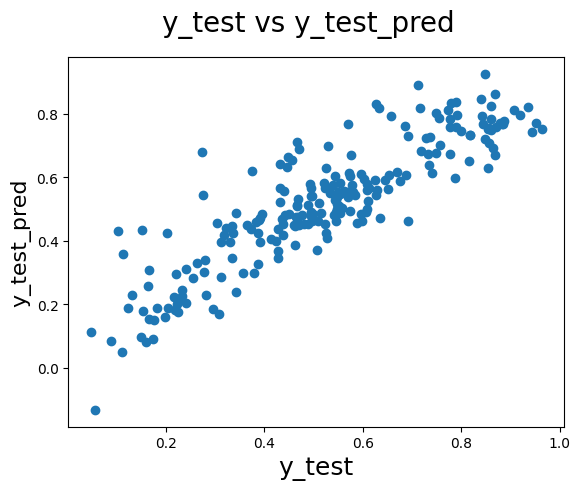

In [305]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

# Conclusion

Linear regression mode developed using multipel varible is

**Bike Demand(Y) ** = 0.0875 + 0.2334*yr - 0.0867*holiday + 0.5682 *temp  
- 0.1455 * windspeed - 0.2535 * light + 0.0812 *summer + 0.1261*winter
+ 0.0895 *Sep
